In [191]:
import os
from dateutil.parser import parse as dateutil_parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PATH = 'season_1/'
CLEAN_PATH = PATH+'clean/'

%matplotlib inline

In [6]:
cluster_map = pd.read_csv(CLEAN_PATH+'cluster_map.csv',index_col=0)
poi = pd.read_csv(CLEAN_PATH+'poi.csv',index_col=0)
train_order = pd.read_pickle(CLEAN_PATH+'train_order.pickle')
test_order = pd.read_pickle(CLEAN_PATH+'test_order.pickle')
train_traffic = pd.read_pickle(CLEAN_PATH+'train_traffic.pickle')
test_traffic = pd.read_pickle(CLEAN_PATH+'test_traffic.pickle')
train_weather = pd.read_pickle(CLEAN_PATH+'train_weather.pickle')
test_weather = pd.read_pickle(CLEAN_PATH+'test_weather.pickle')

In [7]:
train_order_index = pd.Series(range(len(train_order)),index=train_order['Time'])
test_order_index = pd.Series(range(len(test_order)),index=test_order['Time'])

# powerful datetime index

In [31]:
train_order = train_order.sort_values(by = 'Time')

In [33]:
train_order.ix[train_order_index.ix['20160101 13:00:10':'2016-01-01 130012']].sort_values(by = 'Time')

,request,start_district_hash,Price,Time
191031,True,307afa4120c590b3a46cf4ff5415608a,23.0,2016-01-01 13:00:10
344458,True,82cc4851f9e4faa4e54309f8bb73fd7c,46.0,2016-01-01 13:00:10
314427,True,2407d482f0ffa22a947068f2551fe62c,7.0,2016-01-01 13:00:10
151606,True,74c1c25f4b283fa74a5514307b0d0278,9.0,2016-01-01 13:00:10
187033,True,62afaf3288e236b389af9cfdc5206415,28.1,2016-01-01 13:00:10
277818,False,38d5ad2d22b61109fd8e7b43cd0e8901,6.0,2016-01-01 13:00:11
274765,True,4725c39a5e5f4c188d382da3910b3f3f,4.0,2016-01-01 13:00:11
244745,False,929ec6c160e6f52c20a4217c7978f681,19.0,2016-01-01 13:00:11
235748,True,91690261186ae5bee8f83808ea1e4a01,15.0,2016-01-01 13:00:11
394537,True,fc34648599753c9e74ab238e9a4a07ad,8.0,2016-01-01 13:00:11


In [164]:
time_range = pd.date_range('20160101 00:00:00','20160102 00:00',freq='10min')
str(time_range[1])

'2016-01-01 00:10:00'

# split one day into 144 pieces, count trues and falses of every piece

In [165]:
allpieces = pd.DataFrame({'demand': 0.,'supply':0.,'gap':0.}, index = range(144))
allpieces.index.name = 'pieces'
allpieces = pd.DataFrame(allpieces, columns=[ 'demand', 'supply', 'gap'])

In [166]:
allpieces

,demand,supply,gap
time,,,
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0


In [167]:
for i in range(0,144):
    piece = train_order.ix[train_order_index.ix[str(time_range[i]):str(time_range[i+1])]]
    allpieces.loc[i,'demand']  = len(piece)
    for j in range(len(piece)):
        if(piece.iat[j,0] == True):
            allpieces.loc[i,'supply'] = allpieces.loc[i,'supply'] + 1
        else:
            allpieces.loc[i,'gap'] = allpieces.loc[i,'gap'] + 1

In [168]:
allpieces

,demand,supply,gap
time,,,
0,2905.0,2783.0,122.0
1,4004.0,3489.0,515.0
2,5241.0,2968.0,2273.0
3,7427.0,2957.0,4470.0
4,7957.0,2619.0,5338.0
5,7864.0,2489.0,5375.0
6,7167.0,2353.0,4814.0
7,6656.0,2164.0,4492.0
8,5951.0,2079.0,3872.0


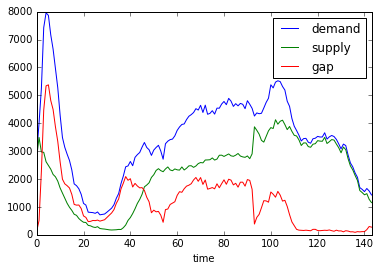

In [185]:
plt.figure()
allpieces.plot()

# Gaps of 21 days plot on one figure

In [222]:
day_range = pd.date_range('20160101 00:00:00','20160122 00:00:00',freq='1d')
day_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22'],
              dtype='datetime64[ns]', freq='D')

In [223]:
gaps = pd.DataFrame(np.zeros((144,21)))
gaps.index.name = 'pieces'

In [224]:
colnames = []
for i in range(21):
    colnames.append('gap' + str(i+1))
gaps.columns = colnames

In [225]:
gaps.head(5)

,gap1,gap2,gap3,gap4,gap5,gap6,gap7,gap8,gap9,gap10,...,gap12,gap13,gap14,gap15,gap16,gap17,gap18,gap19,gap20,gap21
pieces,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
for day in range(21):
    time_range = pd.date_range(str(day_range[day]),str(day_range[day+1]),freq='10min')
    for i in range(0,144):
        piece = train_order.ix[train_order_index.ix[str(time_range[i]):str(time_range[i+1])]]
        for j in range(len(piece)):
            if(piece.iat[j,0] == False):
                gaps.loc[i,'gap' + str(day+1)] = gaps.loc[i,'gap' + str(day+1)] + 1

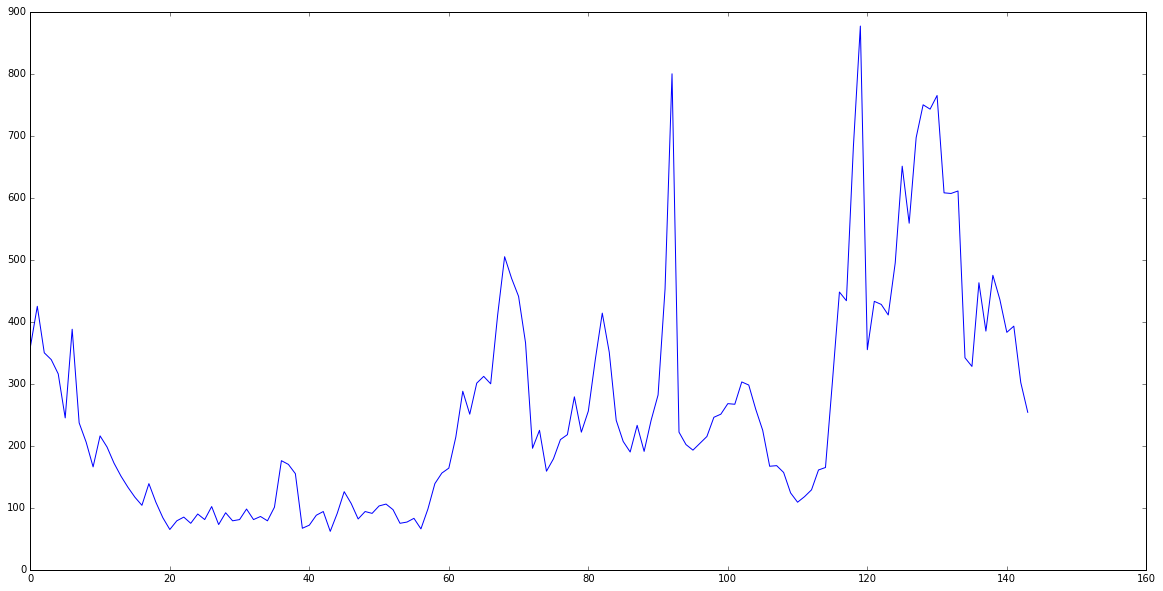

In [280]:
plt.figure(figsize=(20,10))
plt.plot(range(0,144), gaps.loc[:,'gap3'])

In [228]:
day_range2 = pd.date_range('20160122 00:00:00','20160201 00:00:00',freq='2d')
day_range2

In [273]:
gaps2 = pd.DataFrame(np.zeros((144,5)))
gaps2.index.name = 'pieces'
gaps2.columns = ['gap22', 'gap24', 'gap26', 'gap28', 'gap30']

In [274]:
for day in range(5):
    time_range = pd.date_range(str(day_range2[day]),str(day_range2[day+1]),freq='10min')
    for i in range(0,144):
        piece = test_order.ix[test_order_index.ix[str(time_range[i]):str(time_range[i+1])]]
        for j in range(len(piece)):
            if(piece.iat[j,0] == False):
                gaps2.loc[i,'gap' + str(2 * day+22)] = gaps2.loc[i,'gap' + str(2 * day+22)] + 1

In [275]:
gaps2.fillna(value=0)

,gap22,gap24,gap26,gap28,gap30
pieces,,,,,
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0


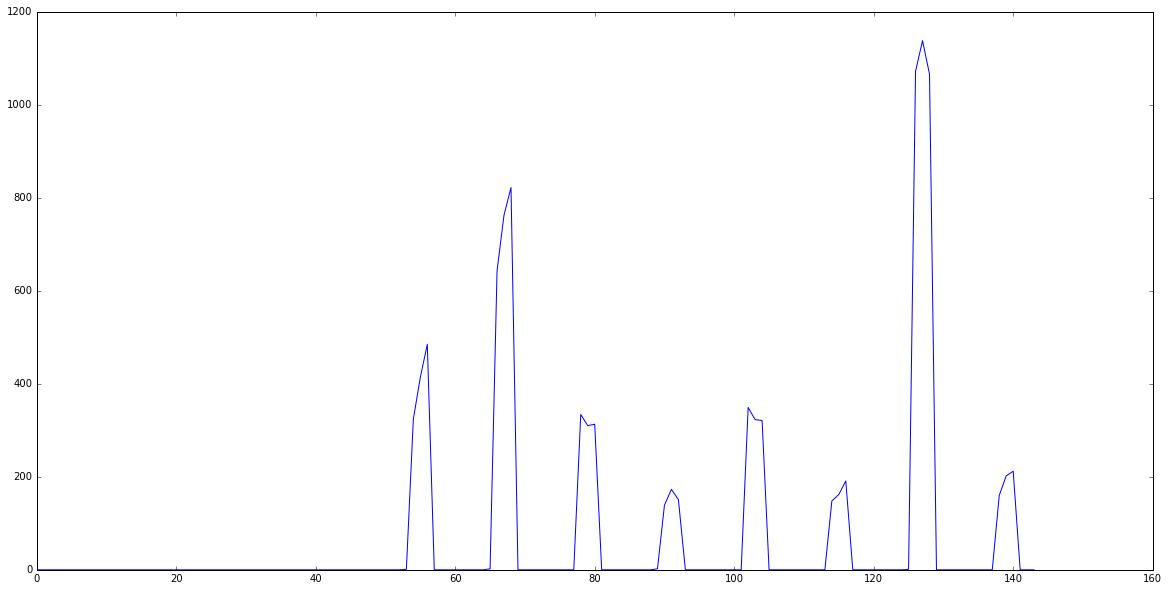

In [279]:
plt.figure(figsize=(20,10))
plt.plot(range(0,144), gaps2.loc[:,'gap24'])

In [282]:
gaps.to_csv(PATH+'clean/train_gap.csv')
gaps2.to_csv(PATH+'clean/test_gap.csv')